In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def markov_chain(transition_matrix, states, start_state, steps):
    P = np.array(transition_matrix)
    M = len(states)
    current = states.index(start_state)
    path = [current]
    cumulative_changes = [0]
    
    for _ in range(steps-1):
        prev = current
        current = np.random.choice(M, p=P[current])
        path.append(current)
        cumulative_changes.append(cumulative_changes[-1] + (current - prev))
        
    return [states[i] for i in path], cumulative_changes

def brownian_motion(transition_matrix, states, position_map, start_state, steps):
    state_path, state_changes = markov_chain(transition_matrix, states, start_state, steps)
    position_path = np.cumsum([position_map[state] for state in state_path])
    return position_path, state_changes

In [ ]:
def n_step_transition_matrix(transition_matrix, n):
    return np.linalg.matrix_power(np.array(transition_matrix), n)

states = ['L', 'R']
P = [[0.7, 0.3], [0.4, 0.6]]
position_map = {'L': -1, 'R': 1}
start_state = 'L'
steps = 100

position_path, state_changes = brownian_motion(P, states, position_map, start_state, steps)

for i in range(1, 10, 2):
    print(f'{i} steps \n {n_step_transition_matrix(P, 10)}')

1 steps 
 [[0.5714311 0.4285689]
 [0.5714252 0.4285748]]
3 steps 
 [[0.5714311 0.4285689]
 [0.5714252 0.4285748]]
5 steps 
 [[0.5714311 0.4285689]
 [0.5714252 0.4285748]]
7 steps 
 [[0.5714311 0.4285689]
 [0.5714252 0.4285748]]
9 steps 
 [[0.5714311 0.4285689]
 [0.5714252 0.4285748]]


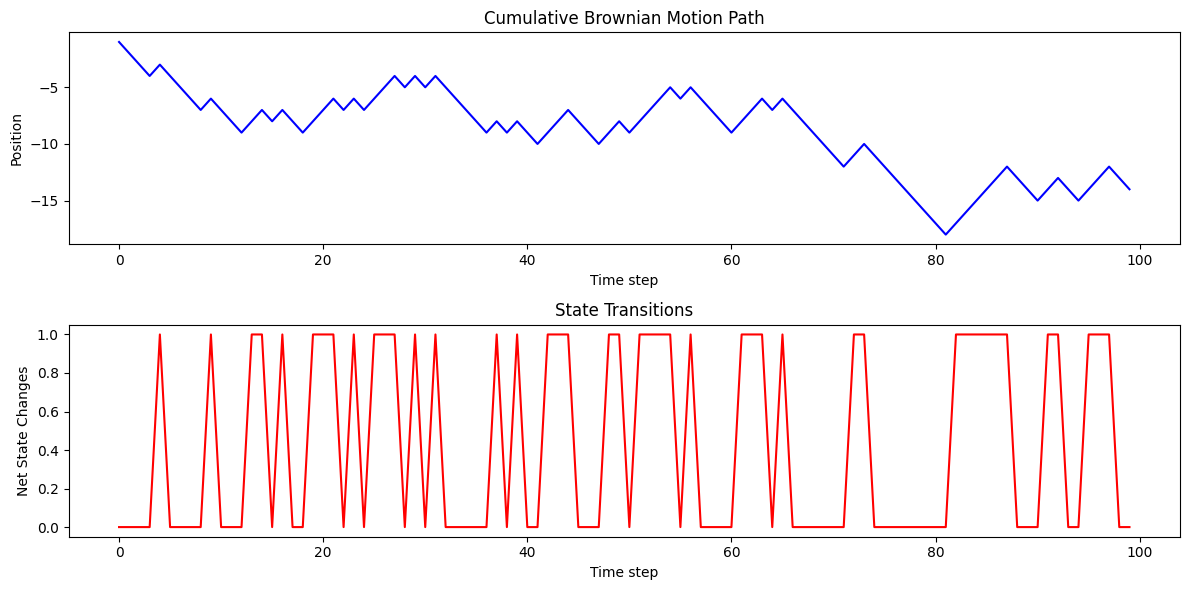

In [5]:
def plot_cumulative_changes(position_path, state_changes, steps):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(range(steps), position_path, 'b-')
    plt.title("Cumulative Brownian Motion Path")
    plt.xlabel("Time step")
    plt.ylabel("Position")
    
    plt.subplot(2, 1, 2)
    plt.plot(range(steps), state_changes, 'r-')
    plt.title("State Transitions")
    plt.xlabel("Time step")
    plt.ylabel("Net State Changes")
    
    plt.tight_layout()
    plt.show()
    
plot_cumulative_changes(position_path, state_changes, steps)